In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from visualize import contour
from visualize import contour_with_quiver
from visualize import surf
from visualize import contour_with_path

xmin, xmax, xstep = -4.0, 4.0, .25
ymin, ymax, ystep = -4.0, 4.0, .25
x, y = np.meshgrid(np.arange(xmin, xmax+xstep, xstep),
                  np.arange(ymin, ymax+ystep, ystep))

f = lambda x, y : (x-2)**2 + (y-2)**2
z = f(x,y)
minima = np.array([2.,2.])
f(*minima)

0.0

[2. 2.] [[2.]
 [2.]]


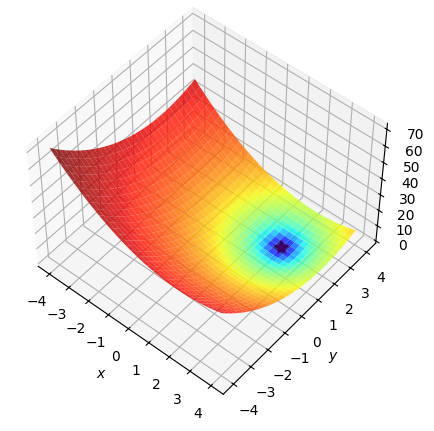

In [15]:
minima_ = minima.reshape(-1,1)
print(minima,minima_)
surf(f, x, y, minima=minima_)

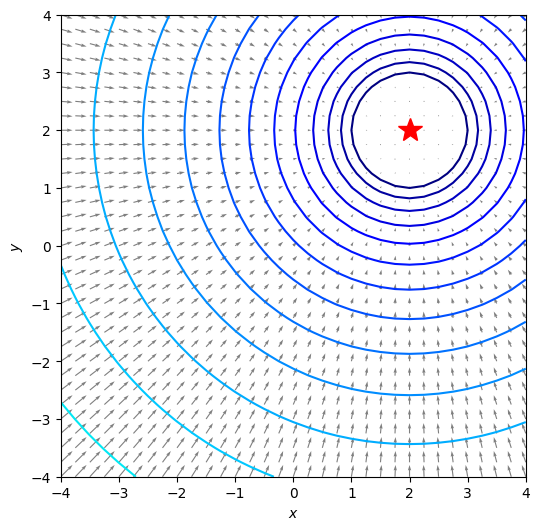

In [16]:
grad_f_x = lambda x,y:2*(x-2)
grad_f_y = lambda x,y:2*(y-2)
contour_with_quiver(f,x,y,grad_f_x,grad_f_y, minima=minima)

0 [2.8 2.8] 1.2799999999999994
1 [1.84 1.84] 0.05119999999999995
2 [2.032 2.032] 0.002048000000000004
3 [1.9936 1.9936] 8.191999999999901e-05
4 [2.00128 2.00128] 3.276799999999733e-06
5 [1.999744 1.999744] 1.310720000000348e-07
6 [2.0000512 2.0000512] 5.242880000028677e-09
7 [1.99998976 1.99998976] 2.097151999975091e-10
8 [2.00000205 2.00000205] 8.388607998445172e-12
9 [1.99999959 1.99999959] 3.355443198650473e-13


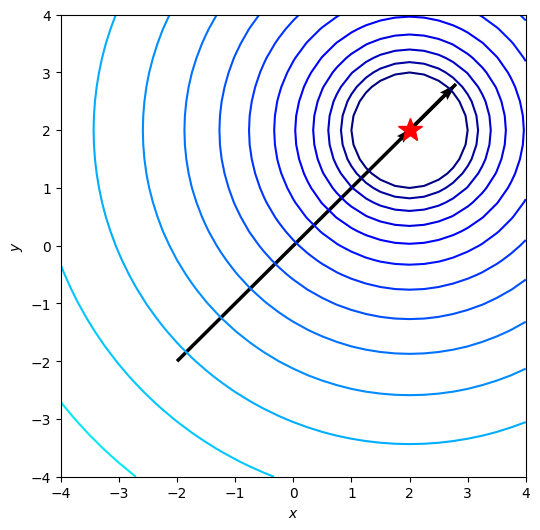

In [17]:
def steepest_descent_twod(func, gradx, grady, x0, Maxiter=10, learning_rate = 0.6, verbose = True):
    paths = [x0]
    fval_paths = [f(x0[0], x0[1])]
    for i in range(Maxiter):
        grad = np.array([grad_f_x(*x0)])
        x1 = x0 - learning_rate * grad
        fval = f(*x1)
        if verbose:
            print(i, x1, fval)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths). T)
    fvalpaths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

x0 = np.array([-2., -2.])
xopt, fopt, paths, fval_paths = steepest_descent_twod(f, grad_f_x, grad_f_y, x0)
contour_with_path(f, x, y, paths, minima = np.array([[2], [2]]))